# Tuning the Logit Model

As with logistic regression, we will begin our process of modellign by normalizing our data and splitting it into test and train sets for further evaluation. Afterwards, we will fit an intial model and evaluate its performance. From there we can continue to refine the model through various tuning procedures until we are satisfied with our results.

Some parameters that we may be interested in tuning are:  
  
### Class Weight
Weights the various classes. By default is none, meaning that both classes will be given equal importance in tuning the model. Alternatively, you can pass 'balanced' in order to assign weights that are inversely proportionally to that class's frequency. The final option is to explicitly pass weights to each class using a dictionary of the form {class_label: weight}.  
  
### L1 and L2 Penalizations
These are the same regularization parameters that we discussed previously in regression. Both of these will penalize larger coefficient weights.  
  
### C: Normalization weight
This is a very important parameter as it controls the degree of normalization for the l1 and l2 parameters. C is the coefficient of normalization as we have discussed in previous lessons.

With that, let's take a look at tuning a model!

## Initial Model:

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


#Load the data
df = pd.read_csv('heart.csv')

#Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

#Normalize the Data
for col in df.columns:
    df[col] = (df[col]-min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Data Preview
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


In [3]:
#Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
print(model_log) #Preview model params

#Predict
y_hat_test = logreg.predict(X_test)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


# Evaluating the model:

In [4]:
from sklearn.metrics import roc_curve, auc

In [7]:
#scikit learns built in roc_curve method returns the fpr, tpr and thresholds
#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

AUC: 0.8738548273431994


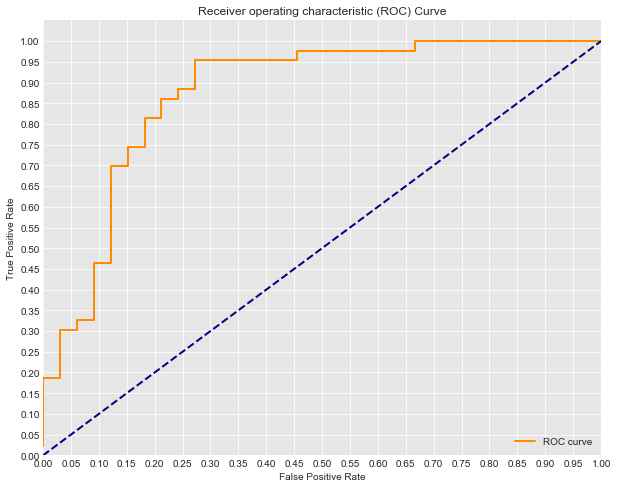

In [12]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

 ### L1 and L2 Penalizations
These are the same regularization parameters that we discussed previously in regression. Both of these will penalize larger coefficient weights. 

In fact to date, we've just been using the default l2 Ridge (or euclidean) normalization parameter. Checkout the details in the docstring:

In [6]:
LogisticRegression?

In [15]:
penalties = ['l1', 'l2']
for n, pen in enumerate(penalties):
    print(n)
    print(pen)

0
l1
1
l2


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[ 0.0175462  -2.02615222  0.8985625  -0.0064546  -0.00572486 -0.64144671
   0.2590188   0.03213618 -0.86973359 -0.5817088   0.29107848 -0.83486596
  -0.80058325]]
AUC for l1: 0.8731501057082452
LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[ 0.01750289 -2.02752116  0.89607186 -0.006493   -0.00572662 -0.6324537
   0.26309414  0.03214769 -0.87102588 -0.57920623  0.29223202 -0.83491311
  -0.79957243]]
AUC for l2: 0.8738548273431994


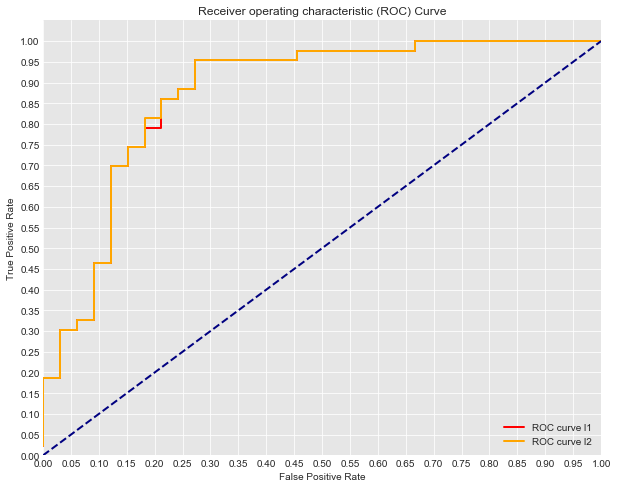

In [28]:
# Now let's compare a few different regularization performances on the dataset:
penalties = ['l1', 'l2'] #l1 is lasso L2 is ridge
colors = ['r', 'orange']

plt.figure(figsize=(10,8))

for n, pen in enumerate(penalties):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, penalty=pen) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params
    print(model_log.coef_)
    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    
    print('AUC for {}: {}'.format(str(pen), auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(pen))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Almost no difference. Let's try customizing some other parameters.

### Class Weight
Weights the various classes. By default is none, meaning that both classes will be given equal importance in tuning the model. Alternatively, you can pass 'balanced' in order to assign weights that are inversely proportionally to that class's frequency. The final option is to explicitly pass weights to each class using a dictionary of the form {class_label: weight}.  

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[ 0.01750289 -2.02752116  0.89607186 -0.006493   -0.00572662 -0.6324537
   0.26309414  0.03214769 -0.87102588 -0.57920623  0.29223202 -0.83491311
  -0.79957243]]
AUC for None: 0.8738548273431994
LogisticRegression(C=1000000000000.0, class_weight='balanced', dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
[[ 0.0165623  -2.08760343  0.89775676 -0.00709745 -0.00602709 -0.61315928
   0.24775539  0.03276974 -0.86624245 -0.56904392  0.30061988 -0.8402816
  -0.80412147]]
AUC for Balanced: 0.8731501057082451
LogisticRegression(C=1000000000000.0, clas

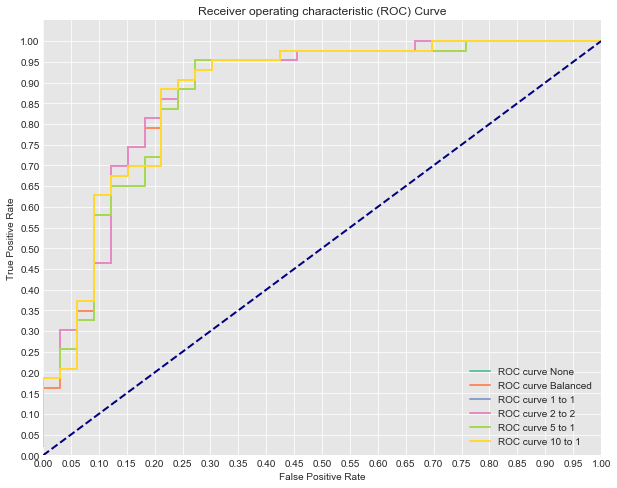

In [31]:
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:1, 0:1}, {1:2, 0:2}, {1:5, 0:1}, {1:10, 0:1}]
names = ['None', 'Balanced', '1 to 1', '2 to 2', '5 to 1', '10 to 1']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = 1e12, class_weight=weight) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params
    print(model_log.coef_)
    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


LogisticRegression(C=0.001, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.001: 0.8273431994362227
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.01: 0.9006342494714588
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.1: 0.9034531360112756
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scal

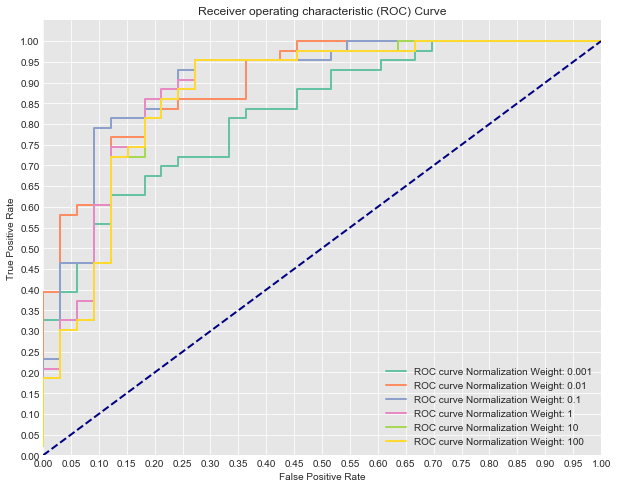

In [33]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.001,0.01,0.1,1,10,100]
names = [0.001,0.01,0.1,1,10,100]
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

LogisticRegression(C=0.005, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.005: 0.8745595489781536
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.1: 0.9034531360112756
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.2: 0.8999295278365047
LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=False,
          intercept_scal

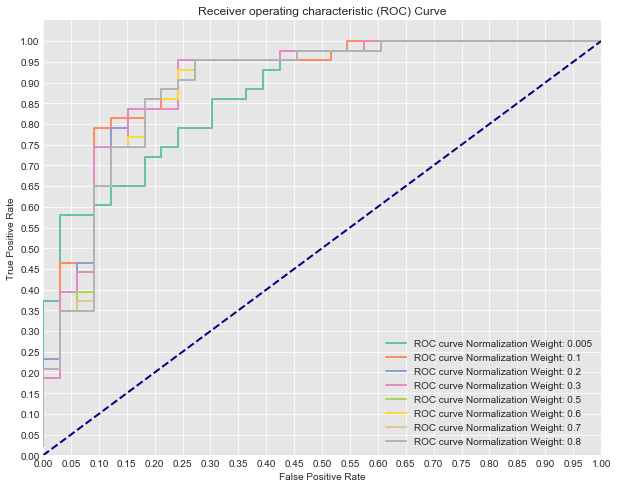

In [34]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Oversampling and Undersampling
Another technique that can be used is oversampling or undersampling. This can help address class imbalance problems when one category is far more prevelant then the other. This is a common case that occurs in medicine, image classification or fraud detection. In many of these scenarios, class imbalance can cause difficulties for the learning algorithm. After all, simply predicting the majority class could yield 99%+ accuracy if the rare class occurs <1% of the time. Due to this, sampling techniques such as oversampling the minority class or undersampling the majority class can help by producing a synthetic dataset that the learning algorithm is trained on. With this, it is important to still maintain a test set from the original dataset in order to accurately judge the accuracy of the algorithm overall.

While these initial modifications will improve the performance of classification algorithms on imbalanced datasets, a more advance technique known as SMOTE has produced even better results in practice.

#### SMOTE
SMOTE stands for Synthetic Minority Oversampling. Here, rather then simply oversampling the minority class with replacement (which simply adds duplicate cases to the dataset), the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.   
   
   Implementing this technique is very easy using the **imblearn** package:

In [36]:
from imblearn.over_sampling import SMOTE, ADASYN

In [37]:
print(y.value_counts()) #Previous original class distribution
X_resampled, y_resampled = SMOTE().fit_sample(X, y) 
print(pd.Series(y_resampled).value_counts()) #Preview synthetic sample class distribution

1    165
0    138
Name: target, dtype: int64
1    165
0    165
dtype: int64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

LogisticRegression(C=0.005, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
AUC for 0.005: 0.8309692671394799
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.1: 0.9083924349881797
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
AUC for 0.2: 0.9083924349881797
LogisticRegression(C=0.3, class_weight=None, dual=False, fit_intercept=False,
          intercept_scal

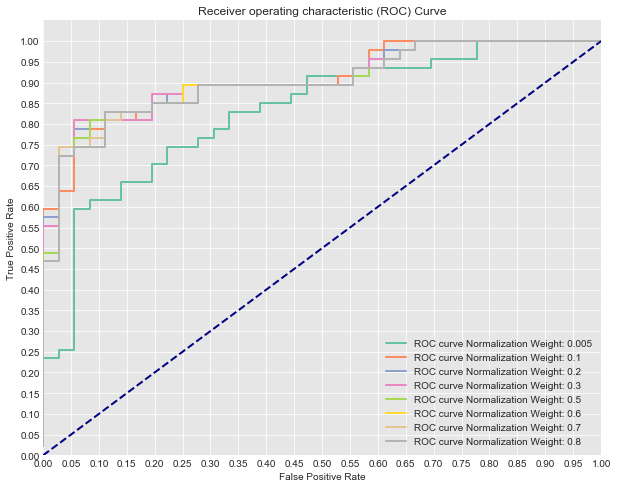

In [39]:
# Now let's compare a few different regularization performances on the dataset:
C_param_range = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]
names = [0.005, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9]
colors = sns.color_palette("Set2", n_colors=len(names))

plt.figure(figsize=(10,8))

for n, c in enumerate(C_param_range):
    #Fit a model
    logreg = LogisticRegression(fit_intercept = False, C = c) #Starter code
    model_log = logreg.fit(X_train, y_train)
    print(model_log) #Preview model params

    #Predict
    y_hat_test = logreg.predict(X_test)

    y_score = logreg.fit(X_train, y_train).decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve Normalization Weight: {}'.format(names[n]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

So there you have it, in this lesson we investigated various tuning parameters for our model, as well as dealing with class imbalance as a whole. In the upcoming lab, you'll have a chance to try and adjust these parameters yourself in order to optimize a model for predicting credit fraud.